In [11]:
import torch
from torchtext.vocab import vocab
from torch import nn
import os 
import sys
from gensim.models import Word2Vec
import pandas as pd
from scipy.stats import spearmanr
from box_embeddings.modules.volume.volume import Volume
from box_embeddings.modules.intersection import Intersection
sys.path.append("../")
from utils.model import BoxModel
direc = "/home/fmollica/word2box_pytorch/weights/skipgram_WikiText103/epochs_3_min_count_50_batch_size_4096_embed_dim_10_lr_0.001_window_10_neg_count_1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load(f'{direc}/model_final.pt', map_location=device)
vocab = torch.load(f'{direc}/vocab.pt')

In [12]:
import pickle

embedding_all_target = model.embeddings_word.all_boxes
# estraggo i volumi dal modello word2box
volumes = model.box_vol(embedding_all_target)
# trasformo i volumi in esponenziali 
volumes_int = torch.exp(volumes)

# indici dei volumi più grandi
idx = (-volumes_int).argsort()

# carico il dizionario delle frequenze
with open(direc + '/frequency.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
for i, value in enumerate(idx.tolist()[0:50]):
    print("word: ", model.vocab.lookup_token(value), " frequency: ", b[value], " Volume: ", volumes_int.tolist()[value])

In [13]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

frequency_desc = [b[x] for x in idx.tolist()]
volume_desc = [volumes_int.tolist()[i] for i in idx.tolist()]
words_desc = [model.vocab.lookup_token(x) for x in idx.tolist()]

data = {"word": words_desc, "frequency": frequency_desc, "volumes": volume_desc}
# creo il dataset contenente i volumi delle parole e le relative frequenze
dataframe = pd.DataFrame(data)

dataframe.to_csv("list.csv", sep='\t', encoding='utf-8')

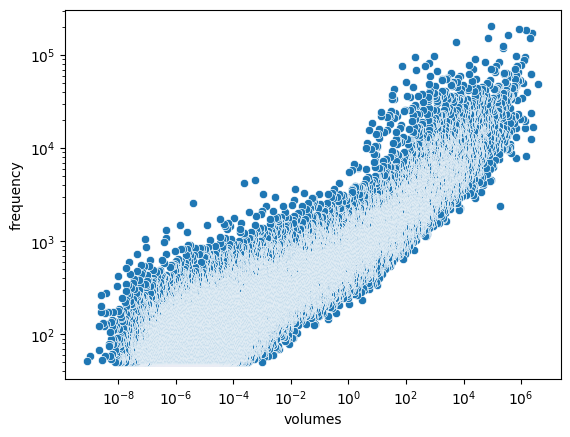

In [14]:
g = sb.scatterplot(data = dataframe, x = "volumes", y = "frequency")
sb.set(rc={'figure.figsize':(15,15)})
g.set_yscale('log')
g.set_xscale('log')
plt.show()

In [15]:
from gensim.models import Word2Vec
import numpy as np

direc = "/home/fmollica/word2box_pytorch/weights/skipgram_WikiText103/epochs_3_min_count_50_batch_size_4096_embed_dim_10_lr_0.001_window_10_neg_count_1"

word2vec_model = Word2Vec.load(f'{direc}/word2vec.model')

words = list(word2vec_model.wv.index_to_key)

idxs = list(range(0, len(vocab)))

lista_norme = []
lista_frequenze = []

for i in idxs:
    vector = word2vec_model.wv.get_vector(model.vocab.lookup_token(i))
    norma = np.linalg.norm(vector)
    lista_norme.append((model.vocab.lookup_token(i),norma,b[i]))


sorted_by_second = sorted(lista_norme, key=lambda tup: tup[1], reverse=True)
lista_norms=[]
lista_frequency=[]
lista_words=[]
for i in sorted_by_second:
    lista_words.append(i[0])
    lista_norms.append(i[1])
    lista_frequency.append(i[2])

data = {"word": lista_words, "frequency": lista_frequency, "norm": lista_norms}
dataframe = pd.DataFrame(data)
dataframe.to_csv("list_w2v.csv", sep='\t', encoding='utf-8')


In [16]:
words=[]
for i in list(range(0,42038)):
    words.append(model.vocab.lookup_token(i))

print(list(set(word2vec_model.wv.index_to_key) - set(words)))

['̇']


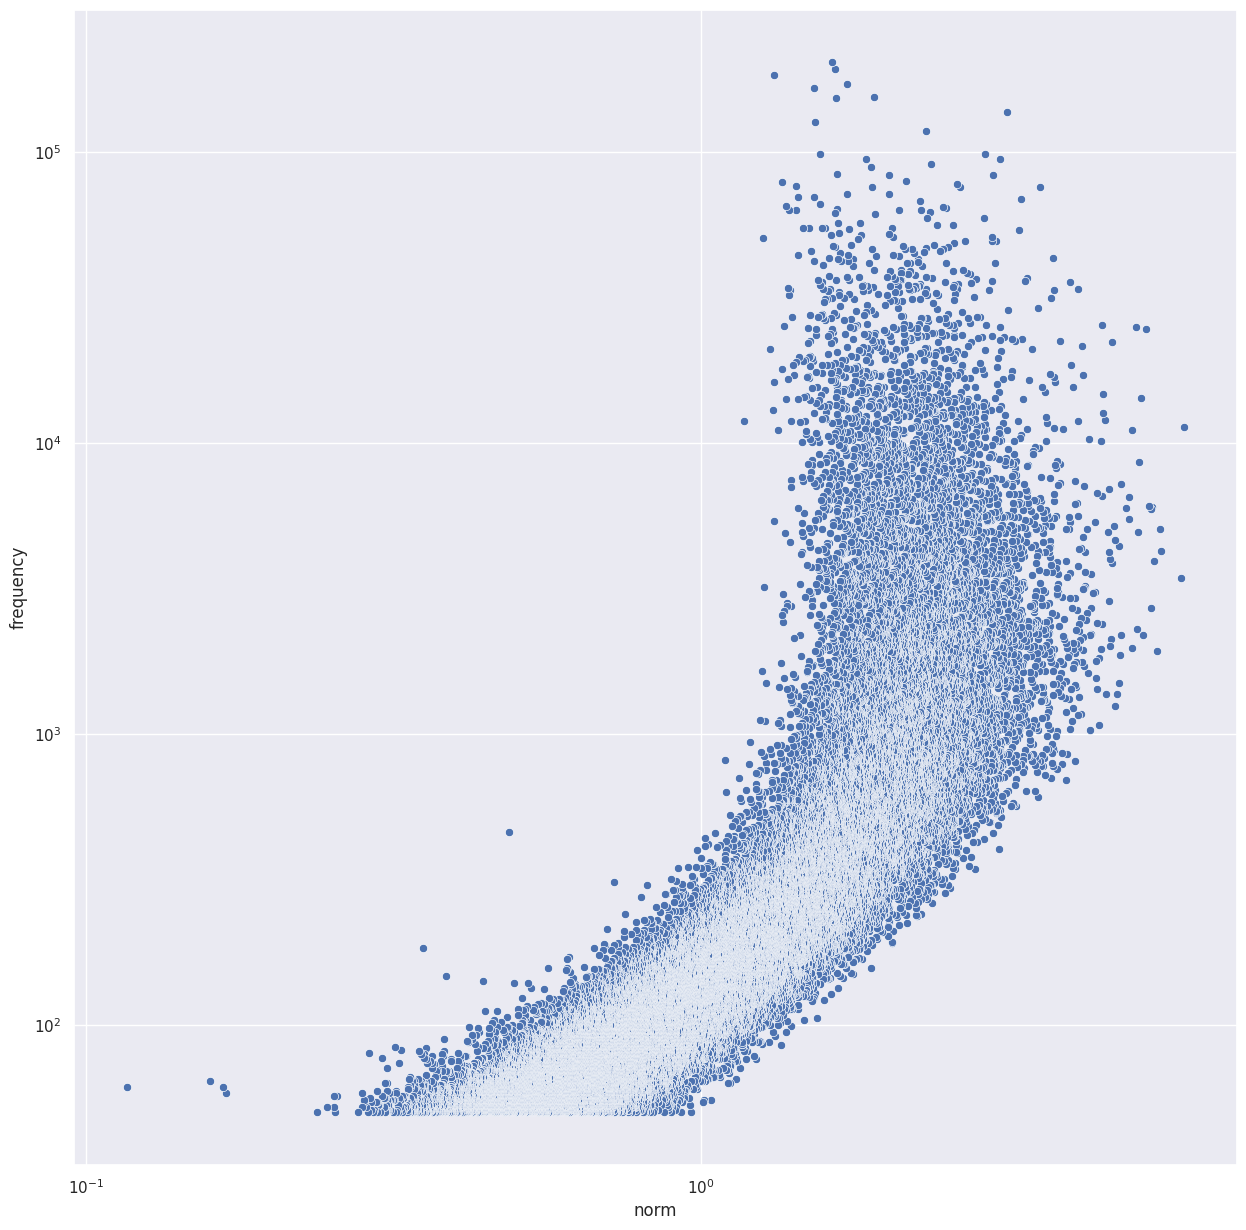

In [17]:
g = sb.scatterplot(data = dataframe, x = "norm", y = "frequency")
sb.set(rc={'figure.figsize':(15,15)})
g.set_yscale('log')
g.set_xscale('log')
plt.show()

# NORME E VOLUMI

42038
42038


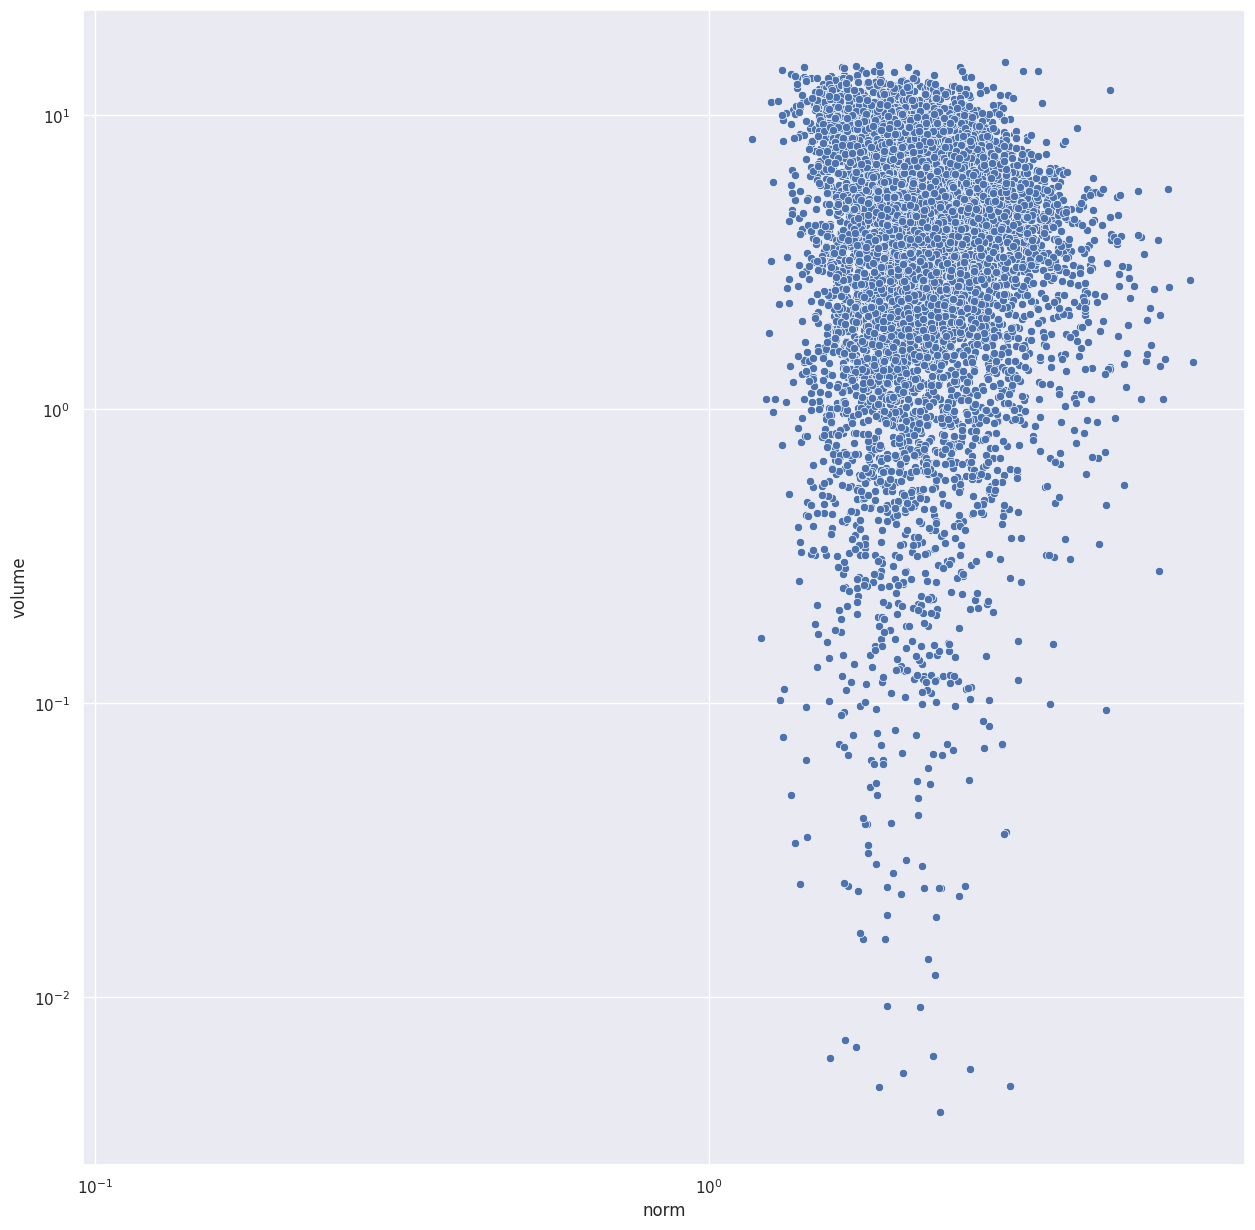

In [18]:
word2vec_model = Word2Vec.load(f'{direc}/word2vec.model')
embedding_all_target = model.embeddings_word.all_boxes
# estraggo i volumi dal modello word2box
volumes = model.box_vol(embedding_all_target).tolist()
idxs = list(range(0, len(volumes)))

lista_norme = []
lista_volumi = []
lista_parole = []

for i in idxs:
    vector = word2vec_model.wv.get_vector(model.vocab.lookup_token(i))
    norma = np.linalg.norm(vector)
    lista_parole.append(model.vocab.lookup_token(i))
    lista_norme.append(norma)
    lista_volumi.append(volumes[i])

print(len(lista_norme))
print(len(lista_volumi))

data = {"parole": lista_parole ,"norm": lista_norme, "volume": lista_volumi}
dataf = pd.DataFrame(data)

g = sb.scatterplot(data = dataf, x = "norm", y = "volume")
sb.set(rc={'figure.figsize':(15,15)})
g.set_yscale('log')
g.set_xscale('log')
#g.set(xlim=(1, None))
plt.show()


In [ ]:
Sulle x metti le parole ordinate per frequenza quindi equispaziate e sulle y il volume (e la norma)

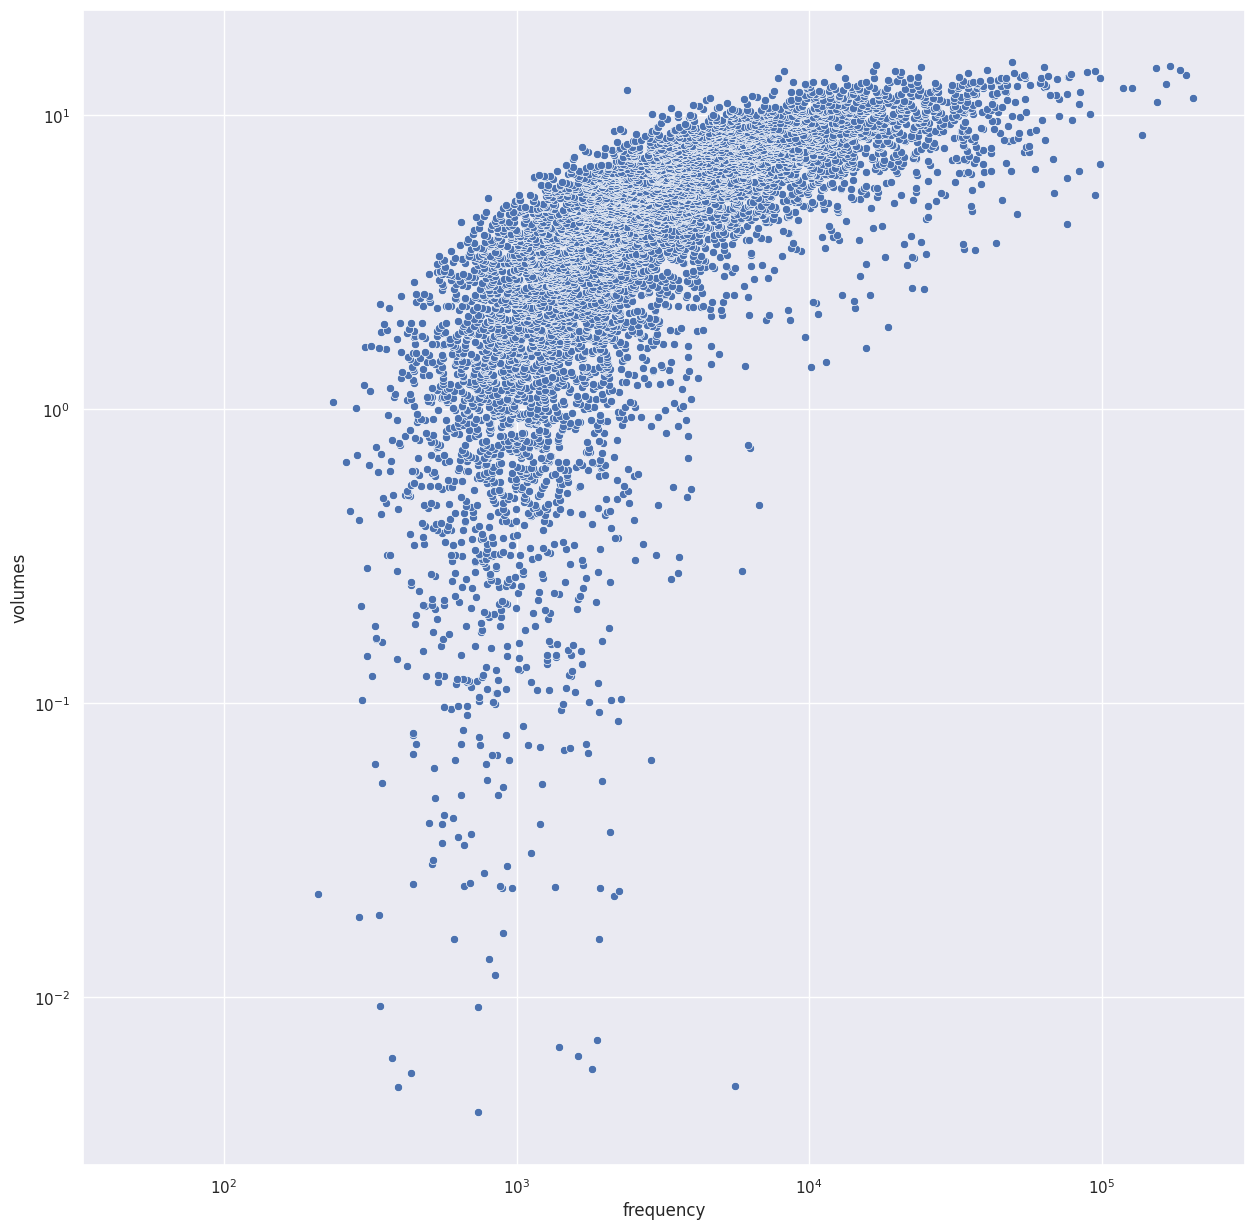

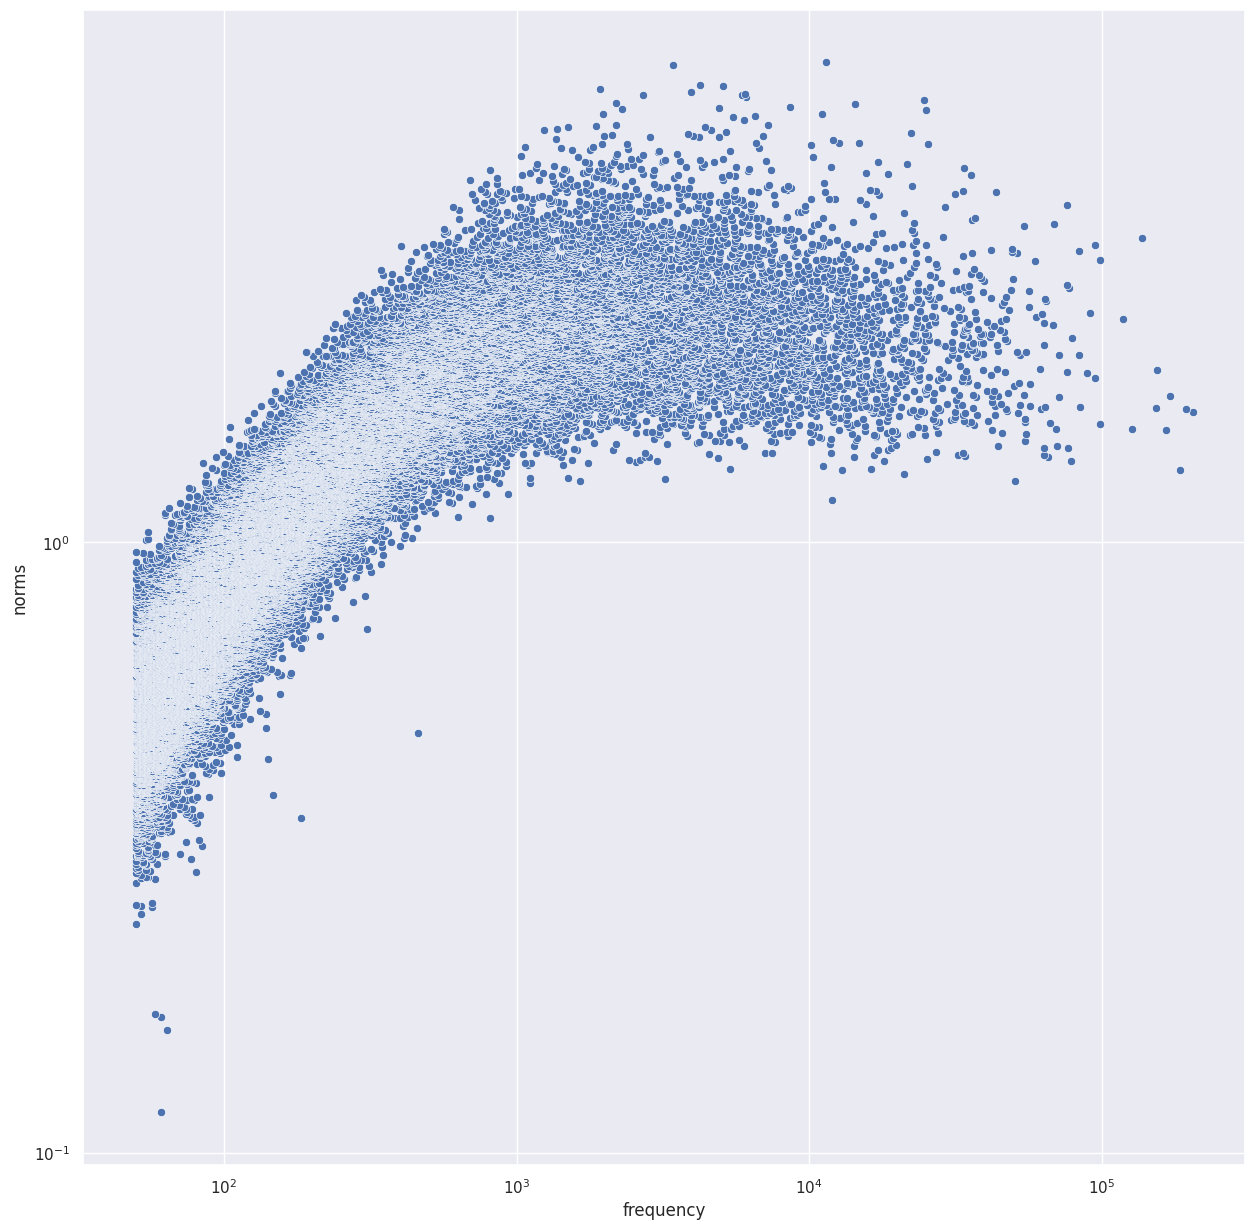

In [19]:
word2vec_model = Word2Vec.load(f'{direc}/word2vec.model')
embedding_all_target = model.embeddings_word.all_boxes
# estraggo i volumi dal modello word2box
volumes = model.box_vol(embedding_all_target).tolist()
idxs = list(range(0, len(volumes)))

lista_box = []

lista_vec = []


for i in idxs:
    lista_box.append((model.vocab.lookup_token(i), volumes[i], b[i]))

    vector = word2vec_model.wv.get_vector(model.vocab.lookup_token(i))
    norma = np.linalg.norm(vector)
    
    lista_vec.append((model.vocab.lookup_token(i), norma, b[i]))

sorted_by_frequency_box = sorted(lista_box, key=lambda tup: tup[1], reverse=False)
sorted_by_frequency_vec = sorted(lista_vec, key=lambda tup: tup[1], reverse=False)


lista_volumes=[]
lista_frequency=[]
lista_words=[]

for i in sorted_by_frequency_box:
    lista_words.append(i[0])
    lista_volumes.append(i[1])
    lista_frequency.append(i[2])

data = {"word": lista_words, "frequency": lista_frequency, "volumes": lista_volumes}
dataframe_zipf_box = pd.DataFrame(data)

lista_norms=[]
lista_frequency=[]
lista_words=[]

for i in sorted_by_frequency_vec:
    lista_words.append(i[0])
    lista_norms.append(i[1])
    lista_frequency.append(i[2])

data = {"word": lista_words ,"frequency": lista_frequency, "norms": lista_norms}
dataframe_zipf_vec = pd.DataFrame(data)

g = sb.scatterplot(data = dataframe_zipf_box, x = "frequency", y = "volumes")
sb.set(rc={'figure.figsize':(15,15)})
g.set_yscale('log')
g.set_xscale('log')
#g.set(xlim=(1, None))
plt.show()


h = sb.scatterplot(data = dataframe_zipf_vec, x = "frequency", y = "norms")
sb.set(rc={'figure.figsize':(15,15)})
h.set_yscale('log')
h.set_xscale('log')
#g.set(xlim=(1, None))
plt.show()
